# MELBOURNE PROJECT

In [1]:
import pandas as pd
import numpy as np
dataraw = pd.read_csv("Melbourne_housing_FULL.csv")
print("The shape of the data: ", dataraw.shape)
dataraw.head(5)

The shape of the data:  (34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# 1. Examine and explore data (visualization, interactions among features)

In [2]:
# In my opinion, there are some features that are not usesful in this data, so I decided to choose the features
# I think they are suitable for this project and we are going to use the data to create a model (Linear Regression) 
# to predict a houses value. But there are three Categories features so I am not going to choose them into 
# the data

In [3]:
data = dataraw.drop(columns=['Suburb','Address','SellerG','Date','Postcode','CouncilArea',
                             'Type','Method','Regionname'])
data.head(5)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,NaN,2.5,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


In [4]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#remove the misssing values in the data
data.dropna(inplace=True)

# show the data then
data.head(5)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0
11,3,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0
14,2,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0


In [5]:
# the description of the data
data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


In [6]:
# Replacing index of data

In [7]:
newindex = [i for i in range(len(data.index))]
#print(newindex)
data.index =  newindex
    
data.head(3)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
1,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
2,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


# Target feature: Price

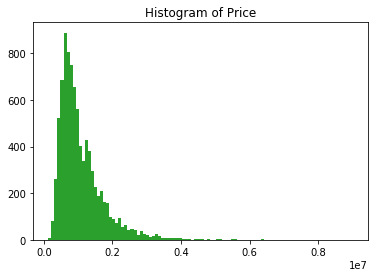

In [9]:
import matplotlib.pyplot as plt
import numpy as np
price  = data.Price.apply(lambda x: int(x))
#print(price)
plt.hist(price,100, range=[min(price),max(price)], color="C2",align='mid')
plt.title("Histogram of Price")
plt.show()

# Rooms feature

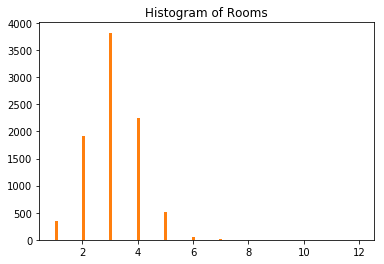

In [10]:
plt.hist(data.Rooms,100, color="C1",align='mid')
plt.title("Histogram of Rooms")
plt.show()

In [11]:
data.Rooms.value_counts()

3     3824
4     2240
2     1912
5      507
1      340
6       51
7        7
8        4
12       1
10       1
Name: Rooms, dtype: int64

# Distance feature

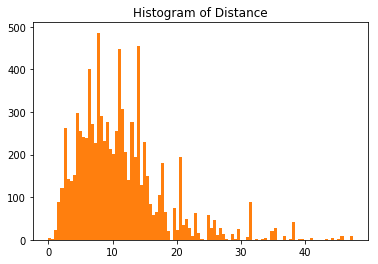

In [12]:
dis = data.Distance.apply(lambda x: x)
plt.hist(dis,100, color="C1",align='mid')
plt.title("Histogram of Distance")
plt.show()

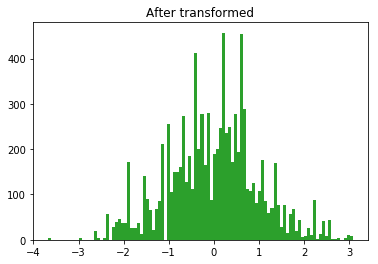

In [13]:
from sklearn.preprocessing import PowerTransformer

dis_a = PowerTransformer()
dis_list = np.array(dis).reshape(-1,1)
dis_a.fit(dis_list)

#def transform_distribution(samples,offset = 100):
    #return transform_model.transform(np.array(samples).reshape(-1,1))+offset
#print(bc.lambdas_)
dis_tf = dis_a.transform(dis_list)
plt.hist(dis_tf,100, color="C2",align='mid')
plt.title("After transformed")
plt.show()

#print(dis_list)
#print(dis_tf)

In [14]:
data["Distance_tf"] = dis_tf
data.head(3)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Distance_tf
0,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,-1.898121
1,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,-1.898121
2,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,-1.898121


# Bedroom2 feature

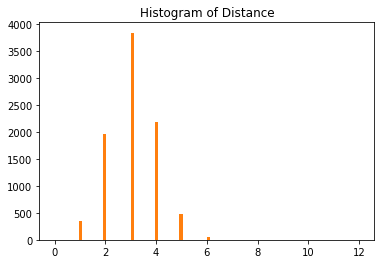

In [15]:
plt.hist(data.Bedroom2,100, color="C1",align='mid')
plt.title("Histogram of Distance")
plt.show()

In [16]:
data.Bedroom2.value_counts()

3.0     3837
4.0     2183
2.0     1965
5.0      487
1.0      348
6.0       50
7.0        5
0.0        5
9.0        3
8.0        2
12.0       1
10.0       1
Name: Bedroom2, dtype: int64

# Bathroom feature

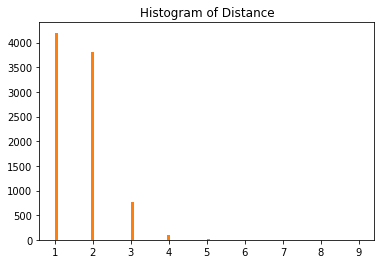

In [17]:
plt.hist(data.Bathroom,100, color="C1",align='mid')
plt.title("Histogram of Distance")
plt.show()

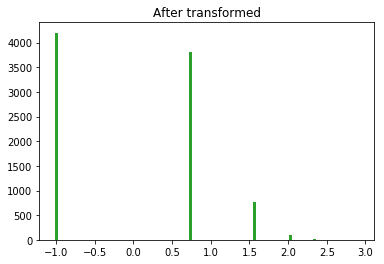

In [18]:
from sklearn.preprocessing import PowerTransformer

bath = data.Bathroom.apply(lambda x: x)

bath_a = PowerTransformer()
bath_list = np.array(bath).reshape(-1,1)
bath_a.fit(bath_list)

#def transform_distribution(samples,offset = 100):
    #return transform_model.transform(np.array(samples).reshape(-1,1))+offset
#print(bc.lambdas_)
bath_tf = bath_a.transform(bath_list)
plt.hist(bath_tf,100, color="C2",align='mid')
plt.title("After transformed")
plt.show()

#print(bath_list)
#print(bath_tf)

In [19]:
data["Bathroom_tf"] = bath_tf
data.head(3)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Distance_tf,Bathroom_tf
0,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,-1.898121,-1.017960
1,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,-1.898121,0.740975
2,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,-1.898121,-1.017960


# Car feature

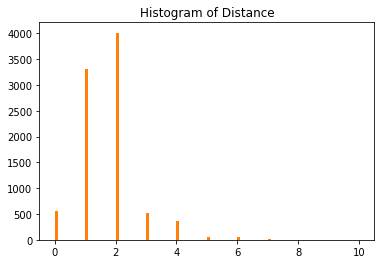

In [20]:
plt.hist(data.Car,100, color="C1",align='mid')
plt.title("Histogram of Distance")
plt.show()

# Landsize feature

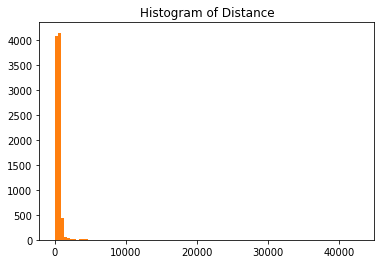

In [21]:
plt.hist(data.Landsize,100, color="C1",align='mid')
plt.title("Histogram of Distance")
plt.show()

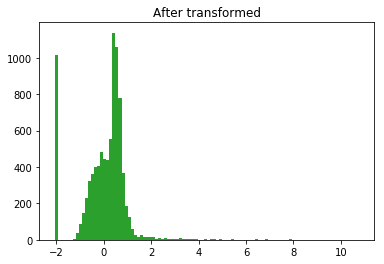

In [22]:
from sklearn.preprocessing import PowerTransformer

land = data.Landsize.apply(lambda x: x)

land_a = PowerTransformer()
land_list = np.array(land).reshape(-1,1)
land_a.fit(land_list)

#def transform_distribution(samples,offset = 100):
    #return transform_model.transform(np.array(samples).reshape(-1,1))+offset
#print(bc.lambdas_)
land_tf = land_a.transform(land_list)
plt.hist(land_tf,100, color="C2",align='mid')
plt.title("After transformed")
plt.show()

#print(land_list)
#print(land_tf)

In [23]:
data["Landsize_tf"] = land_tf
data.head(3)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Distance_tf,Bathroom_tf,Landsize_tf
0,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,-1.898121,-1.017960,-0.610273
1,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,-1.898121,0.740975,-0.702716
2,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,-1.898121,-1.017960,-0.766689


# BuildingArea feature

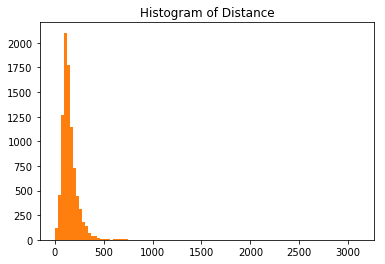

In [24]:
plt.hist(data.BuildingArea,100, color="C1",align='mid')
plt.title("Histogram of Distance")
plt.show()

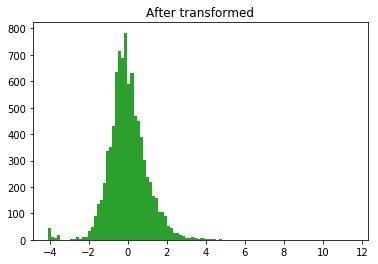

In [25]:
from sklearn.preprocessing import PowerTransformer

area = data.BuildingArea.apply(lambda x: x)

area_a = PowerTransformer()
area_list = np.array(area).reshape(-1,1)
area_a.fit(area_list)

#def transform_distribution(samples,offset = 100):
    #return transform_model.transform(np.array(samples).reshape(-1,1))+offset
#print(bc.lambdas_)
area_tf = area_a.transform(area_list)
plt.hist(area_tf,100, color="C2",align='mid')
plt.title("After transformed")
plt.show()

#print(area_list)
#print(area_tf)

In [26]:
data["BuildingArea_tf"] = area_tf
data.head(3)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Distance_tf,Bathroom_tf,Landsize_tf,BuildingArea_tf
0,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,-1.898121,-1.017960,-0.610273,-0.925948
1,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,-1.898121,0.740975,-0.702716,0.166533
2,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,-1.898121,-1.017960,-0.766689,0.061793


# YearBuilt feature

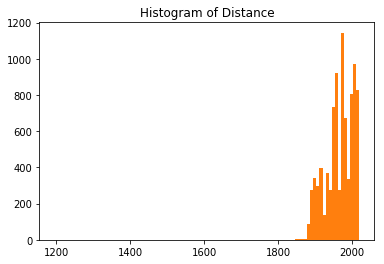

In [27]:
plt.hist(data.YearBuilt,100, color="C1",align='mid')
plt.title("Histogram of Distance")
plt.show()

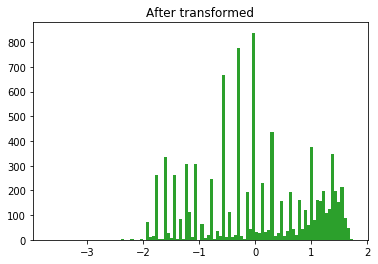

In [28]:
from sklearn.preprocessing import PowerTransformer

year = data.YearBuilt.apply(lambda x: x)

year_a = PowerTransformer()
year_list = np.array(year).reshape(-1,1)
year_a.fit(year_list)

#def transform_distribution(samples,offset = 100):
    #return transform_model.transform(np.array(samples).reshape(-1,1))+offset
#print(bc.lambdas_)
year_tf = year_a.transform(year_list)
plt.hist(year_tf,100, color="C2",align='mid')
plt.title("After transformed")
plt.show()

#print(year_list)
#print(year_tf)

In [29]:
data["YearBuilt_tf"] = year_tf
data.head(3)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Distance_tf,Bathroom_tf,Landsize_tf,BuildingArea_tf,YearBuilt_tf
0,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,-1.898121,-1.017960,-0.610273,-0.925948,-1.621641
1,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,-1.898121,0.740975,-0.702716,0.166533,-1.621641
2,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,-1.898121,-1.017960,-0.766689,0.061793,1.528799


# Propertycount feature

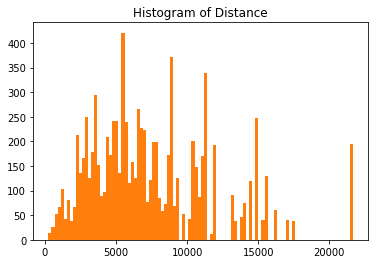

In [30]:
plt.hist(data.Propertycount,100, color="C1",align='mid')
plt.title("Histogram of Distance")
plt.show()

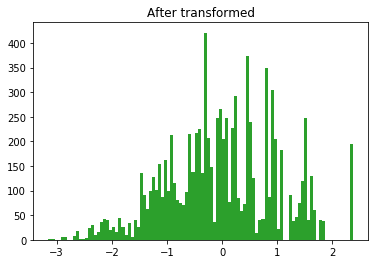

In [31]:
from sklearn.preprocessing import PowerTransformer

pro = data.Propertycount.apply(lambda x: x)

pro_a = PowerTransformer()
pro_list = np.array(pro).reshape(-1,1)
pro_a.fit(pro_list)

#def transform_distribution(samples,offset = 100):
    #return transform_model.transform(np.array(samples).reshape(-1,1))+offset
#print(bc.lambdas_)
pro_tf = pro_a.transform(pro_list)
plt.hist(pro_tf,100, color="C2",align='mid')
plt.title("After transformed")
plt.show()

#print(pro_list)
#print(pro_tf)

In [32]:
data["Propertycount_tf"] = pro_tf
data.head(3)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Distance_tf,Bathroom_tf,Landsize_tf,BuildingArea_tf,YearBuilt_tf,Propertycount_tf
0,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,-1.898121,-1.017960,-0.610273,-0.925948,-1.621641,-0.748531
1,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,-1.898121,0.740975,-0.702716,0.166533,-1.621641,-0.748531
2,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,-1.898121,-1.017960,-0.766689,0.061793,1.528799,-0.748531


# Lattitude feature

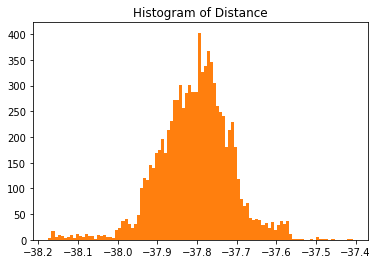

In [33]:
plt.hist(data.Lattitude,100, color="C1",align='mid')
plt.title("Histogram of Distance")
plt.show()

# Longtitude feature

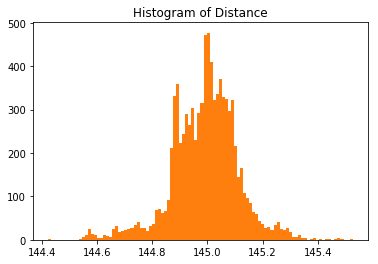

In [34]:
plt.hist(data.Longtitude ,100, color="C1",align='mid')
plt.title("Histogram of Distance")
plt.show()

In [35]:
# Now, I am going to find the relation ship between each feature with the target feature(Price)

# Distance and Price

Text(0, 0.5, 'Price')

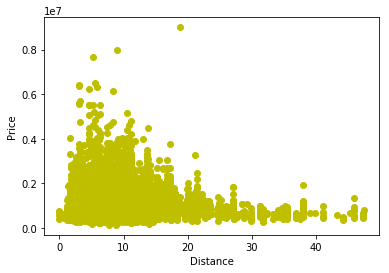

In [36]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

plt.plot(data.Distance,data.Price,'yo')
plt.xlabel('Distance')
plt.ylabel('Price')

In [37]:
# We can se that with a smaller distance the Price of the house will be bigger. I think with the small distance
# the house will be nearer to the shopping mall, hospital, school, office,... or somethings like that. So It will
# be more convenient for the onwer if their house near above places.

In [38]:
from sklearn import linear_model
import math
dis = data[['Distance']]
price  = data['Price']

dis_lm = linear_model.LinearRegression()
dis_lm.fit(dis,price)

# show the accuracy of Distance and Price
print("The correlation coefficient value of Distance feature and target Price: ",
      math.sqrt(dis_lm.score(dis,price)))

#########
bc = PowerTransformer(method='box-cox')


The correlation coefficient value of Distance feature and target Price:  0.23121166070024884


# Bedroom2 and Price

Text(0, 0.5, 'Price')

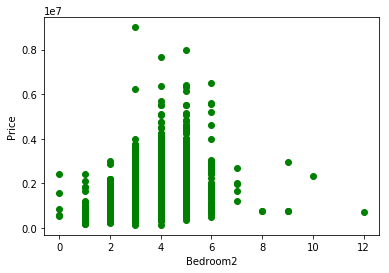

In [39]:
plt.plot(data.Bedroom2,data.Price,'go')
plt.xlabel('Bedroom2')
plt.ylabel('Price')

In [40]:
data.Bedroom2.value_counts()

3.0     3837
4.0     2183
2.0     1965
5.0      487
1.0      348
6.0       50
7.0        5
0.0        5
9.0        3
8.0        2
12.0       1
10.0       1
Name: Bedroom2, dtype: int64

In [41]:
bed = data[['Bedroom2']]
price  = data['Price']

dis_lm = linear_model.LinearRegression()
dis_lm.fit(bed,price)

# show the accuracy of Distance and Price
print("The correlation coefficient value of Distance feature and target Price: ",
      math.sqrt(dis_lm.score(bed,price)))

The correlation coefficient value of Distance feature and target Price:  0.4608803704041086


# Landsize and Price

Text(0, 0.5, 'Price')

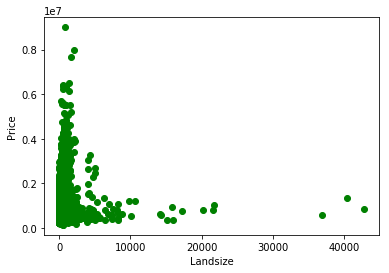

In [42]:
plt.plot(data.Landsize,data.Price,'go')
plt.xlabel('Landsize')
plt.ylabel('Price')

In [43]:
from sklearn import linear_model

land = data[['Landsize']]
price  = data['Price']

dis_lm = linear_model.LinearRegression()
dis_lm.fit(land,price)

# show the accuracy of Distance and Price
print("The correlation coefficient value of Distance feature and target Price: ",
      math.sqrt(dis_lm.score(land,price)))

The correlation coefficient value of Distance feature and target Price:  0.05837480225919904


# Lattitude +Longtitude and Price

Text(0, 0.5, 'Price')

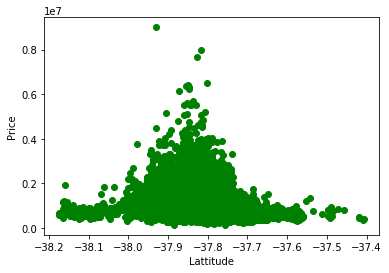

In [44]:
plt.plot(data.Lattitude,data.Price,'go')
plt.xlabel('Lattitude')
plt.ylabel('Price')

In [45]:
from sklearn import linear_model

lat = data[['Lattitude']]
price  = data['Price']

lat_lm = linear_model.LinearRegression()
lat_lm.fit(lat,price)

# show the accuracy of Distance and Price
print("The correlation coefficient value of Lattitude feature and target Price: ",
      math.sqrt(lat_lm.score(lat,price)))

The correlation coefficient value of Lattitude feature and target Price:  0.22425526857714512


Text(0, 0.5, 'Price')

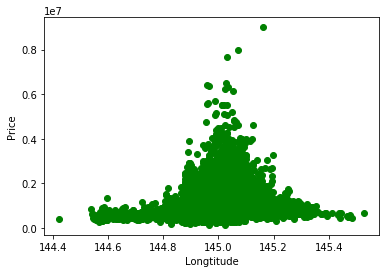

In [46]:
plt.plot(data.Longtitude,data.Price,'go')
plt.xlabel('Longtitude')
plt.ylabel('Price')

In [47]:
from sklearn import linear_model
import math
long = data[['Longtitude']]
price  = data['Price']

long_lm = linear_model.LinearRegression()
long_lm.fit(long,price)

# show the accuracy of Distance and Price
print("The correlation coefficient value of Longtitude feature and target Price: ",
      math.sqrt(long_lm.score(long,price)))

The correlation coefficient value of Longtitude feature and target Price:  0.2121736623201465


# Visualazition on Rooms feature effect Price target

In [48]:
# First, we are going to see there are how many house for each number of rooms in this data

In [49]:
print(data.Rooms.value_counts())

3     3824
4     2240
2     1912
5      507
1      340
6       51
7        7
8        4
12       1
10       1
Name: Rooms, dtype: int64


The average Price the house which has 1 room 418665.4411764706
The average Price the house which has 2 rooms 747038.2034518828
The average Price the house which has 3 rooms 1034564.7107740586
The average Price the house which has 4 rooms 1384634.8526785714
The average Price the house which has 5 rooms 1881408.1992110454
The average Price the house which has 6 rooms 2128098.0392156863
The average Price the house which has 7 rooms 1914571.4285714286
The average Price the house which has 8 rooms 1335500.0
The average Price the house which has 10 rooms 2315000.0
The average Price the house which has 12 rooms 710000.0


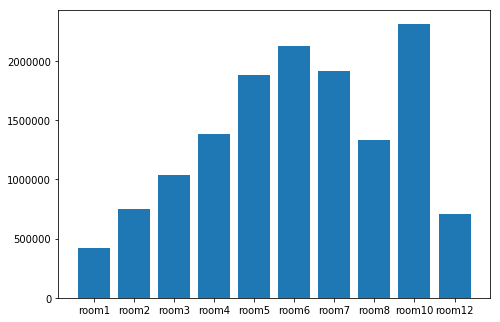

In [50]:
room1 = []
room2 = []
room3 = []
room4 = []
room5 = []
room6 = []
room7 = []
room8 = []
room10 = []
room12 = []
for i in range(len(data.Rooms)):
    if data.Rooms[i] == 1:
        room1.append(data.Price[i])
    elif data.Rooms[i] == 2:
        room2.append(data.Price[i])
    elif data.Rooms[i] == 3:
        room3.append(data.Price[i])
    elif data.Rooms[i] == 4:
        room4.append(data.Price[i])
    elif data.Rooms[i] == 5:
        room5.append(data.Price[i])
    elif data.Rooms[i] == 6:
        room6.append(data.Price[i])
    elif data.Rooms[i] == 7:
        room7.append(data.Price[i])
    elif data.Rooms[i] == 8:
        room8.append(data.Price[i])
    elif data.Rooms[i] == 10:
        room10.append(data.Price[i])
    elif data.Rooms[i] == 12:
        room12.append(data.Price[i])
    else:
        pass

def average(lst):
    return sum(lst)/len(lst)

print("The average Price the house which has 1 room",average(room1))
print("The average Price the house which has 2 rooms",average(room2))
print("The average Price the house which has 3 rooms",average(room3))
print("The average Price the house which has 4 rooms",average(room4))
print("The average Price the house which has 5 rooms",average(room5))
print("The average Price the house which has 6 rooms",average(room6))
print("The average Price the house which has 7 rooms",average(room7))
print("The average Price the house which has 8 rooms",average(room8))
print("The average Price the house which has 10 rooms",average(room10))
print("The average Price the house which has 12 rooms",average(room12))

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['room1','room2','room3','room4','room5','room6','room7','room8','room10','room12']
students = [average(room1),average(room2),average(room3),average(room4)
               ,average(room5),average(room6),average(room7),average(room8),average(room10),average(room12)]
ax.bar(langs,students)
plt.show()

In [51]:
# applying oneway ANOVA test on Rooms feature
from scipy.stats import f_oneway
f_oneway(room1,room2,room3,room4,room5,room6,room7,room8,room10,room12)

F_onewayResult(statistic=302.8184377807331, pvalue=0.0)

In [52]:
# First, we can make say that for each house has a difference number of rooms will has a difference price.
# And base on this data, we can see that the house has 10 rooms whichs has the highest price.

# Visualazition on Car feature effect Price target

In [53]:
# First, we are going to see there are how many houses for each number of cars in this data

In [54]:
print(data.Car.value_counts())

2.0     4014
1.0     3318
0.0      553
3.0      523
4.0      366
6.0       50
5.0       47
7.0        8
8.0        5
10.0       2
9.0        1
Name: Car, dtype: int64


Car0:  553
Car1:  3318
Car2:  4014
Car3:  523
Car4:  366
Car5:  47
Car6:  50
Car7:  8
Car8:  5
Car9:  1
Car10:  2
The average Price the house which has 0 car 1101447.1971066908
The average Price the house which has 1 car 872215.2278481013
The average Price the house which has 2 cars 1201276.6791230692
The average Price the house which has 3 cars 1356369.326959847
The average Price the house which has 4 cars 1422464.7595628416
The average Price the house which has 5 cars 1425340.425531915
The average Price the house which has 6 cars 1286270.0
The average Price the house which has 7 cars 2005000.0
The average Price the house which has 8 cars 1219400.0
The average Price the house which has 10 cars 2100000.0
The average Price the house which has 12 cars 1018500.0


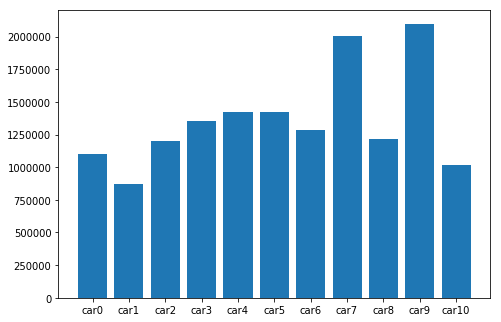

In [55]:
car0 = []
car1 = []
car2 = []
car3 = []
car4 = []
car5 = []
car6 = []
car7 = []
car8 = []
car9 = []
car10 = []

for i in range(len(data.Car)):
    if data.Car[i] == 0:
        car0.append(data.Price[i])
    elif data.Car[i] == 1:
        car1.append(data.Price[i])
    elif data.Car[i] == 2:
        car2.append(data.Price[i])
    elif data.Car[i] == 3:
        car3.append(data.Price[i])
    elif data.Car[i] == 4:
        car4.append(data.Price[i])
    elif data.Car[i] == 5:
        car5.append(data.Price[i])
    elif data.Car[i] == 6:
        car6.append(data.Price[i])
    elif data.Car[i] == 7:
        car7.append(data.Price[i])
    elif data.Car[i] == 8:
        car8.append(data.Price[i])
    elif data.Car[i] == 9:
        car9.append(data.Price[i])
    elif data.Car[i] == 10:
        car10.append(data.Price[i])
    else:
        pass
print("Car0: ",len(car0))
print("Car1: ",len(car1))
print("Car2: ",len(car2))
print("Car3: ",len(car3))
print("Car4: ",len(car4))
print("Car5: ",len(car5))
print("Car6: ",len(car6))
print("Car7: ",len(car7))
print("Car8: ",len(car8))
print("Car9: ",len(car9))
print("Car10: ",len(car10))
    
def average(lst):
    return sum(lst)/len(lst)

print("The average Price the house which has 0 car",average(car0))
print("The average Price the house which has 1 car",average(car1))
print("The average Price the house which has 2 cars",average(car2))
print("The average Price the house which has 3 cars",average(car3))
print("The average Price the house which has 4 cars",average(car4))
print("The average Price the house which has 5 cars",average(car5))
print("The average Price the house which has 6 cars",average(car6))
print("The average Price the house which has 7 cars",average(car7))
print("The average Price the house which has 8 cars",average(car8))
print("The average Price the house which has 10 cars",average(car9))
print("The average Price the house which has 12 cars",average(car10))

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['car0','car1','car2','car3','car4','car5','car6','car7','car8','car9','car10']
students = [average(car0),average(car1),average(car2),average(car3),average(car4),
            average(car5),average(car6),average(car7),average(car8),average(car9),
            average(car10)]
ax.bar(langs,students)
plt.show()

In [56]:
# applying oneway ANOVA test on Car feature
from scipy.stats import f_oneway
f_oneway(car0,car1,car2,car3,car4,car5,car6,car7,car8,car9,car10)

F_onewayResult(statistic=69.9620862763524, pvalue=2.7462338493202787e-138)

In [57]:
# First, we can make say that for each house has a difference number of cars will has a difference price.
# And base on this data, we can see that the house has 9 cars whichs has the highest price.

# 2. Apply the model for prediction with holdout and cross validation

# a. Holdout

In [58]:
df = data[['Rooms', 'Price','Distance_tf','Bedroom2','Bathroom_tf','Car','Landsize_tf','BuildingArea_tf',
          'YearBuilt_tf','Propertycount_tf','Lattitude','Longtitude']]
df.head(5)

,Rooms,Price,Distance_tf,Bedroom2,Bathroom_tf,Car,Landsize_tf,BuildingArea_tf,YearBuilt_tf,Propertycount_tf,Lattitude,Longtitude
0,2,1035000.0,-1.898121,2.0,-1.017960,0.0,-0.610273,-0.925948,-1.621641,-0.748531,-37.8079,144.9934
1,3,1465000.0,-1.898121,3.0,0.740975,0.0,-0.702716,0.166533,-1.621641,-0.748531,-37.8093,144.9944
2,4,1600000.0,-1.898121,3.0,-1.017960,2.0,-0.766689,0.061793,1.528799,-0.748531,-37.8072,144.9941
3,3,1876000.0,-1.898121,4.0,0.740975,0.0,-0.303709,0.862293,-1.441736,-0.748531,-37.8024,144.9993
4,2,1636000.0,-1.898121,2.0,-1.017960,2.0,-0.271119,-0.443935,-1.788000,-0.748531,-37.8060,144.9954


In [59]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# first, store target data to a variable y
y = df['Price']
print(len(y))

# second, store feature data to a variable x
x = df[['Rooms','Distance_tf','Bedroom2','Bathroom_tf',
          'Car','Landsize_tf','BuildingArea_tf','YearBuilt_tf','Propertycount_tf','Lattitude','Longtitude']]
print(len(x))

# create testing and training sets for hold-out verification using scikit learn method
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.2)

# validate set shapes
print("Train data: ",X_train.shape, y_train.shape)
print("Test data: ",X_test.shape, y_test.shape)

8887
8887
Train data:  (7109, 11) (7109,)
Test data:  (1778, 11) (1778,)


Accuracy:  0.595185553282137


Text(0, 0.5, 'y_test')

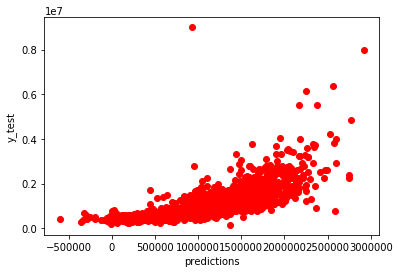

In [60]:
# fit a model using linear model method from sklearn
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

# generate predictions
predictions = lm.predict(X_test)

# show the accuracy of the model
print("Accuracy: ",lm.score(X_train, y_train))

# show predictions and y_test values
#print(predictions)
#print(y_test)

# calculate the error betwwen predicted values and y_test values
error = y_test - predictions
#print(len(a))
plt.plot(predictions,y_test,'ro')
plt.xlabel('predictions')
plt.ylabel('y_test')

Text(0, 0.5, 'error')

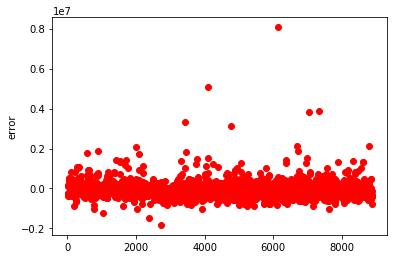

In [61]:
plt.plot(error,'ro')
plt.ylabel('error')

# b. Cross validation

In [62]:
# I am going to create the train data for cross validation
k_y = y
k_x = np.array(x)
#print(k_y)
#print(k_x)

In [87]:
# use cross_val_predict to generate K-Fold predictions
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# apply linear regression with cross validation(k = 10)
lm_k = linear_model.LinearRegression()
k_predictions = cross_val_predict(lm_k, k_x, k_y, cv=10)

#print(k_predictions)
#print(k_y)

# show the accuracy of each model and the average accuracy of the model
k_score = cross_val_score(lm_k, k_x, k_y, cv=10)
print("Score of k=10: ",k_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (k_score.mean(), k_score.std() * 2))

Score of k=10:  [0.58569783 0.67935349 0.64553068 0.55071415 0.58332888 0.55878209
 0.40516773 0.478628   0.54785257 0.60029024]
Accuracy: 0.56 (+/- 0.15)


Text(0, 0.5, 'k_y')

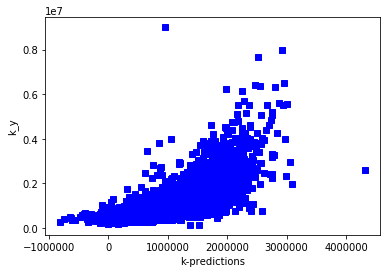

In [89]:
plt.plot(k_predictions,k_y,'bs')
plt.xlabel('k-predictions')
plt.ylabel('k_y')

Text(0, 0.5, 'error')

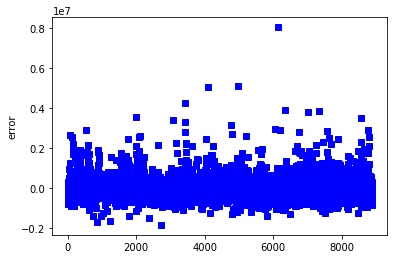

In [86]:
k_error = k_y - k_predictions
plt.plot(k_error,'bs')
plt.ylabel('error')

# 3. Using PCA, apply the model with holdout and cross validation

# a. Holdout using PCA

In [66]:
df_pca = data[['Rooms', 'Price','Distance_tf','Bedroom2','Bathroom_tf','Car','Landsize_tf','BuildingArea_tf',
          'YearBuilt_tf','Propertycount_tf','Lattitude','Longtitude']]
df_pca.head(5)

,Rooms,Price,Distance_tf,Bedroom2,Bathroom_tf,Car,Landsize_tf,BuildingArea_tf,YearBuilt_tf,Propertycount_tf,Lattitude,Longtitude
0,2,1035000.0,-1.898121,2.0,-1.017960,0.0,-0.610273,-0.925948,-1.621641,-0.748531,-37.8079,144.9934
1,3,1465000.0,-1.898121,3.0,0.740975,0.0,-0.702716,0.166533,-1.621641,-0.748531,-37.8093,144.9944
2,4,1600000.0,-1.898121,3.0,-1.017960,2.0,-0.766689,0.061793,1.528799,-0.748531,-37.8072,144.9941
3,3,1876000.0,-1.898121,4.0,0.740975,0.0,-0.303709,0.862293,-1.441736,-0.748531,-37.8024,144.9993
4,2,1636000.0,-1.898121,2.0,-1.017960,2.0,-0.271119,-0.443935,-1.788000,-0.748531,-37.8060,144.9954


In [90]:
from sklearn import decomposition

y_pca = df_pca['Price']
print(len(y))
#print(y_pca)

# second, store feature data to a variable x
x_pca = df_pca[['Rooms','Distance_tf','Bedroom2','Bathroom_tf',
          'Car','Landsize_tf','BuildingArea_tf','YearBuilt_tf','Propertycount_tf','Lattitude','Longtitude']]
print(len(x))
#print(x_pca)

pca = decomposition.PCA(n_components=11)
pca.fit(x_pca)
x_pca_after = pca.transform(x_pca)
#print(x_pca_after)

8887
8887


In [75]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# create testing and training sets for hold-out verification using scikit learn method
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( x_pca_after, y_pca, test_size = 0.2)

# validate set shapes
print("Train data: ",X_train_pca.shape, y_train_pca.shape)
print("Test data: ",X_test_pca.shape, y_test_pca.shape)

Train data:  (7109, 11) (7109,)
Test data:  (1778, 11) (1778,)


Accuracy after applying PCA:  0.5794920326554243


Text(0, 0.5, 'y_test')

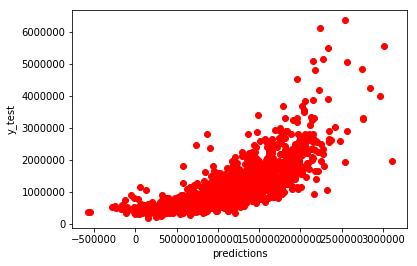

In [77]:
# fit a model using linear model method from sklearn
lm_pca = linear_model.LinearRegression()
model_pca = lm_pca.fit(X_train_pca, y_train_pca)

# generate predictions
predictions_pca = lm_pca.predict(X_test_pca)

# show the accuracy of the model
print("Accuracy after applying PCA: ",lm_pca.score(X_train_pca, y_train_pca))

# show predictions and y_test values
#print(predictions)
#print(y_test)

# calculate the error betwwen predicted values and y_test values
error_pca = y_test_pca - predictions_pca
#print(len(a))
plt.plot(predictions_pca,y_test_pca,'ro')
plt.xlabel('predictions')
plt.ylabel('y_test')

Text(0, 0.5, 'error')

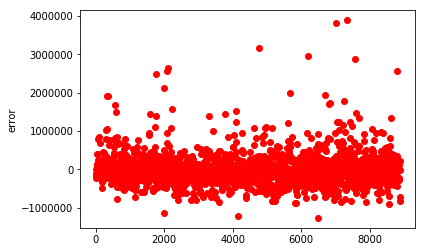

In [79]:
plt.plot(error_pca,'ro')
plt.ylabel('error')

# b. Cross validation using PCA

In [81]:
# I am going to create the train data for cross validation
k_y_pca = y_pca
k_x_pca = np.array(x_pca)
#print(k_y)
#print(k_x)
# use cross_val_predict to generate K-Fold predictions
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# apply linear regression with cross validation(k = 10)
lm_k_pca = linear_model.LinearRegression()
k_predictions_pca = cross_val_predict(lm_k_pca, k_x_pca, k_y_pca, cv=10)

#print(k_predictions)
#print(k_y)

# show the accuracy of each model and the average accuracy of the model
k_score_pca = cross_val_score(lm_k_pca, k_x_pca, k_y_pca, cv=10)
print("Score of k=10: ",k_score_pca)
print("Accuracy: %0.2f (+/- %0.2f)" % (k_score_pca.mean(), k_score_pca.std() * 2))

Score of k=10:  [0.58569783 0.67935349 0.64553068 0.55071415 0.58332888 0.55878209
 0.40516773 0.478628   0.54785257 0.60029024]
Accuracy: 0.56 (+/- 0.15)


Text(0, 0.5, 'k_y')

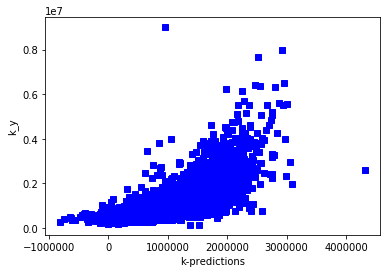

In [84]:
plt.plot(k_predictions_pca,k_y_pca,'bs')
plt.xlabel('k-predictions')
plt.ylabel('k_y')

Text(0, 0.5, 'error')

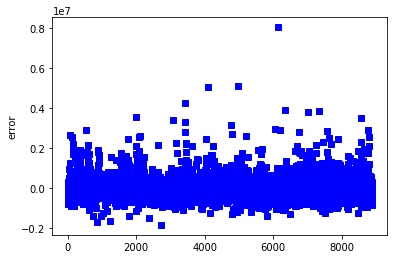

In [85]:
k_error_pca = k_y_pca - k_predictions_pca
plt.plot(k_error_pca,'bs')
plt.ylabel('error')

# 4. Visualize the residue and homoscedasticity